# DATASET INFORMATION

In [1]:
#Importing needed libraries

import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Storing the data into the dataframe

df=pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
#Printing its first 5 rows of the dataset

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
#Printing last 5 rows of the dataset

df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [5]:
#Printing any of the row as a sample from the dataset

df.sample()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
675,F,0.52,0.395,0.18,0.64,0.158,0.11,0.245,22


In [6]:
#Printing the shape of the dataset

df.shape

(4177, 9)

In [7]:
#Only two variables are different i.e. sex (object type) & rings (integer type)

df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [8]:
#Showing all the columns that are presented into the dataset 

df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [9]:
#Checking skewnes of the data so that we get an idea to remove it

df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [10]:
#Getting the information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [11]:
#Checking is there any null value present in all the presented columns 
#There are no null values as it is showing 0 in all the columns

df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

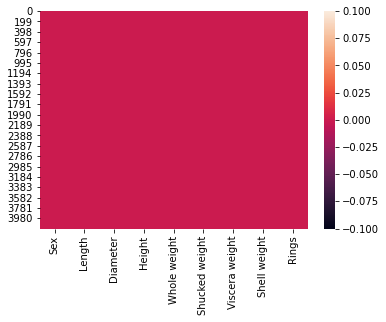

In [12]:
#Plotting heatmap showing there are no null values

sns.heatmap(df.isnull())

# STATISTICAL SUMMARY

In [13]:
#Showing the statistical summary of the dataset

df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [14]:
#Showing 

df.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [15]:
df.Rings.nunique()

28

# UNIVARIET ANALYSIS

<AxesSubplot:xlabel='Rings', ylabel='count'>

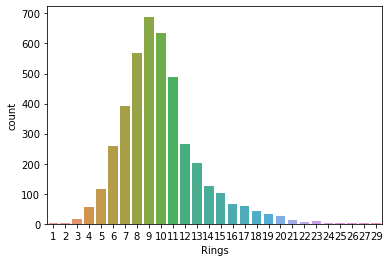

In [16]:
#Showing countplot through seaborn
#It is slighted towards right
#From 7 to 12 we see that most numbers of counts occured there

sns.countplot(x='Rings',data=df)

<AxesSubplot:xlabel='Rings', ylabel='Whole weight'>

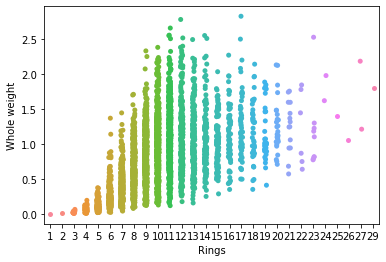

In [17]:
#As we can see with the help of stripplot that rings are increasing as whole weight.
#They shows +ve relationship amoung each other

sns.stripplot(data=df,x='Rings',y='Whole weight')

<AxesSubplot:xlabel='Rings', ylabel='Density'>

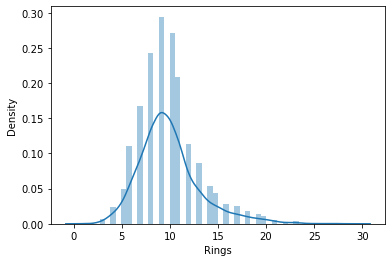

In [18]:
#Showing distribution plot of rings to check that how is the curve distributed

sns.distplot(df['Rings'])

<AxesSubplot:xlabel='Rings'>

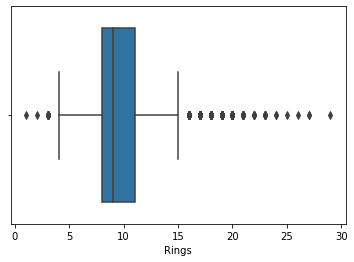

In [19]:
#Showing boxplot & as we can see there are so many points are there outside the boxplot 
#Stats that there are outliers in our target column

sns.boxplot(df['Rings'])

<AxesSubplot:xlabel='Rings'>

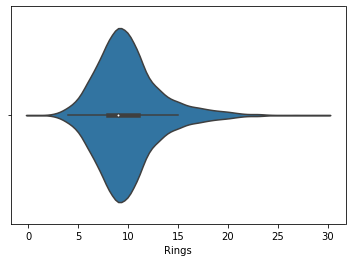

In [20]:
#Showing violinplot of our target variable
#Intensity is high b/w 6 to 13 approximately

sns.violinplot(df['Rings'])

<AxesSubplot:xlabel='Rings', ylabel='Count'>

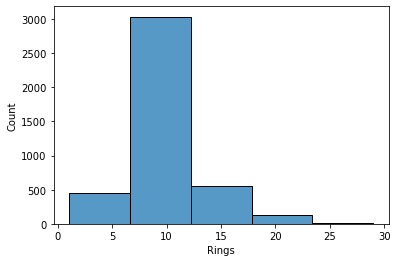

In [21]:
#Plotting histogram

sns.histplot(df['Rings'],bins=5)

# CONVERTING SEX COLUMN INTO INTEGER FORMAT

In [22]:
#Converting the sex column into integer format as we now need to do bi b=variet analysis
#Importing LabelEncoder for converting the column into integer format

le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# BI-VARIET ANALYSIS

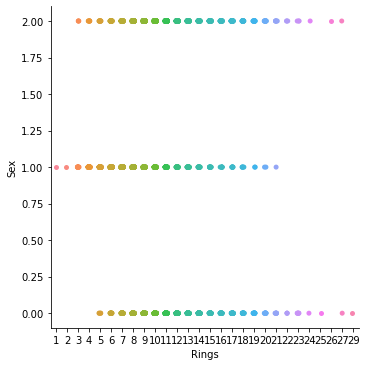

In [23]:
#Plotting catplot

sns.catplot(x='Rings',y='Sex',data=df)

<AxesSubplot:xlabel='Rings', ylabel='Sex'>

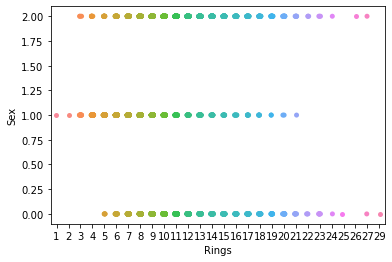

In [24]:
#Plotting stripplot

sns.stripplot(x='Rings',y='Sex',data=df)

<AxesSubplot:xlabel='Rings', ylabel='Sex'>

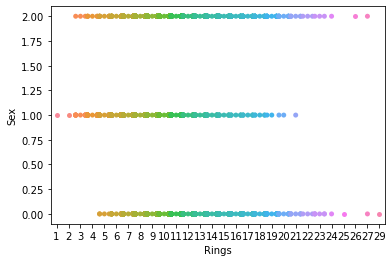

In [25]:
#Plotting swarmplot

sns.swarmplot(x='Rings',y='Sex',data=df)

<AxesSubplot:xlabel='Rings', ylabel='Sex'>

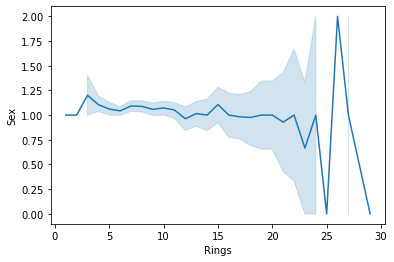

In [26]:
#Ploting line plot 

sns.lineplot(x='Rings',y='Sex',data=df)

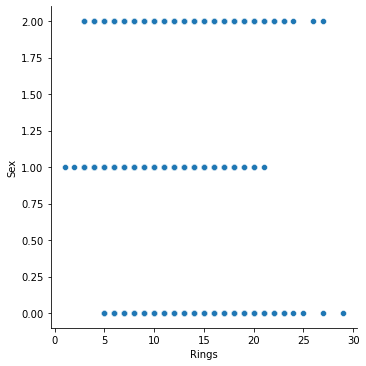

In [27]:
#Ploting relplot

sns.relplot(x='Rings',y='Sex',data=df)

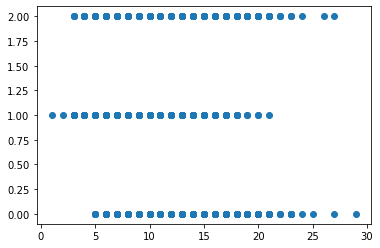

In [28]:
#Ploting scatter plot

plt.scatter(df['Rings'],df['Sex'])
plt.show()

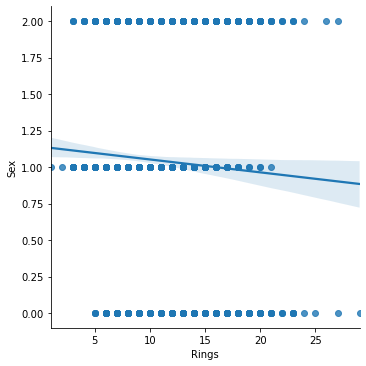

In [29]:
#Ploting lm plot

sns.lmplot('Rings','Sex',data=df)

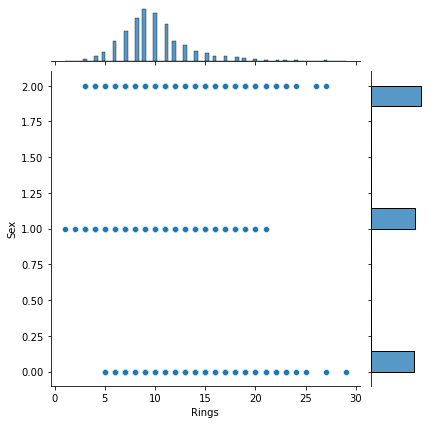

In [30]:
#Plotting Jointplot

sns.jointplot(x='Rings',y='Sex',data=df)

<AxesSubplot:xlabel='Rings', ylabel='Sex'>

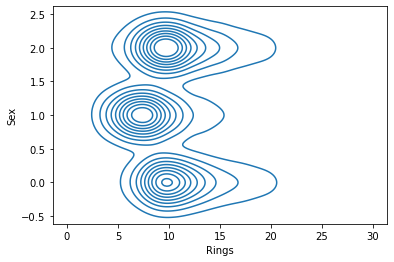

In [31]:
#Ploting kde plot

sns.kdeplot(x='Rings',y='Sex',data=df)

# MULTIVARIET ANALYSIS

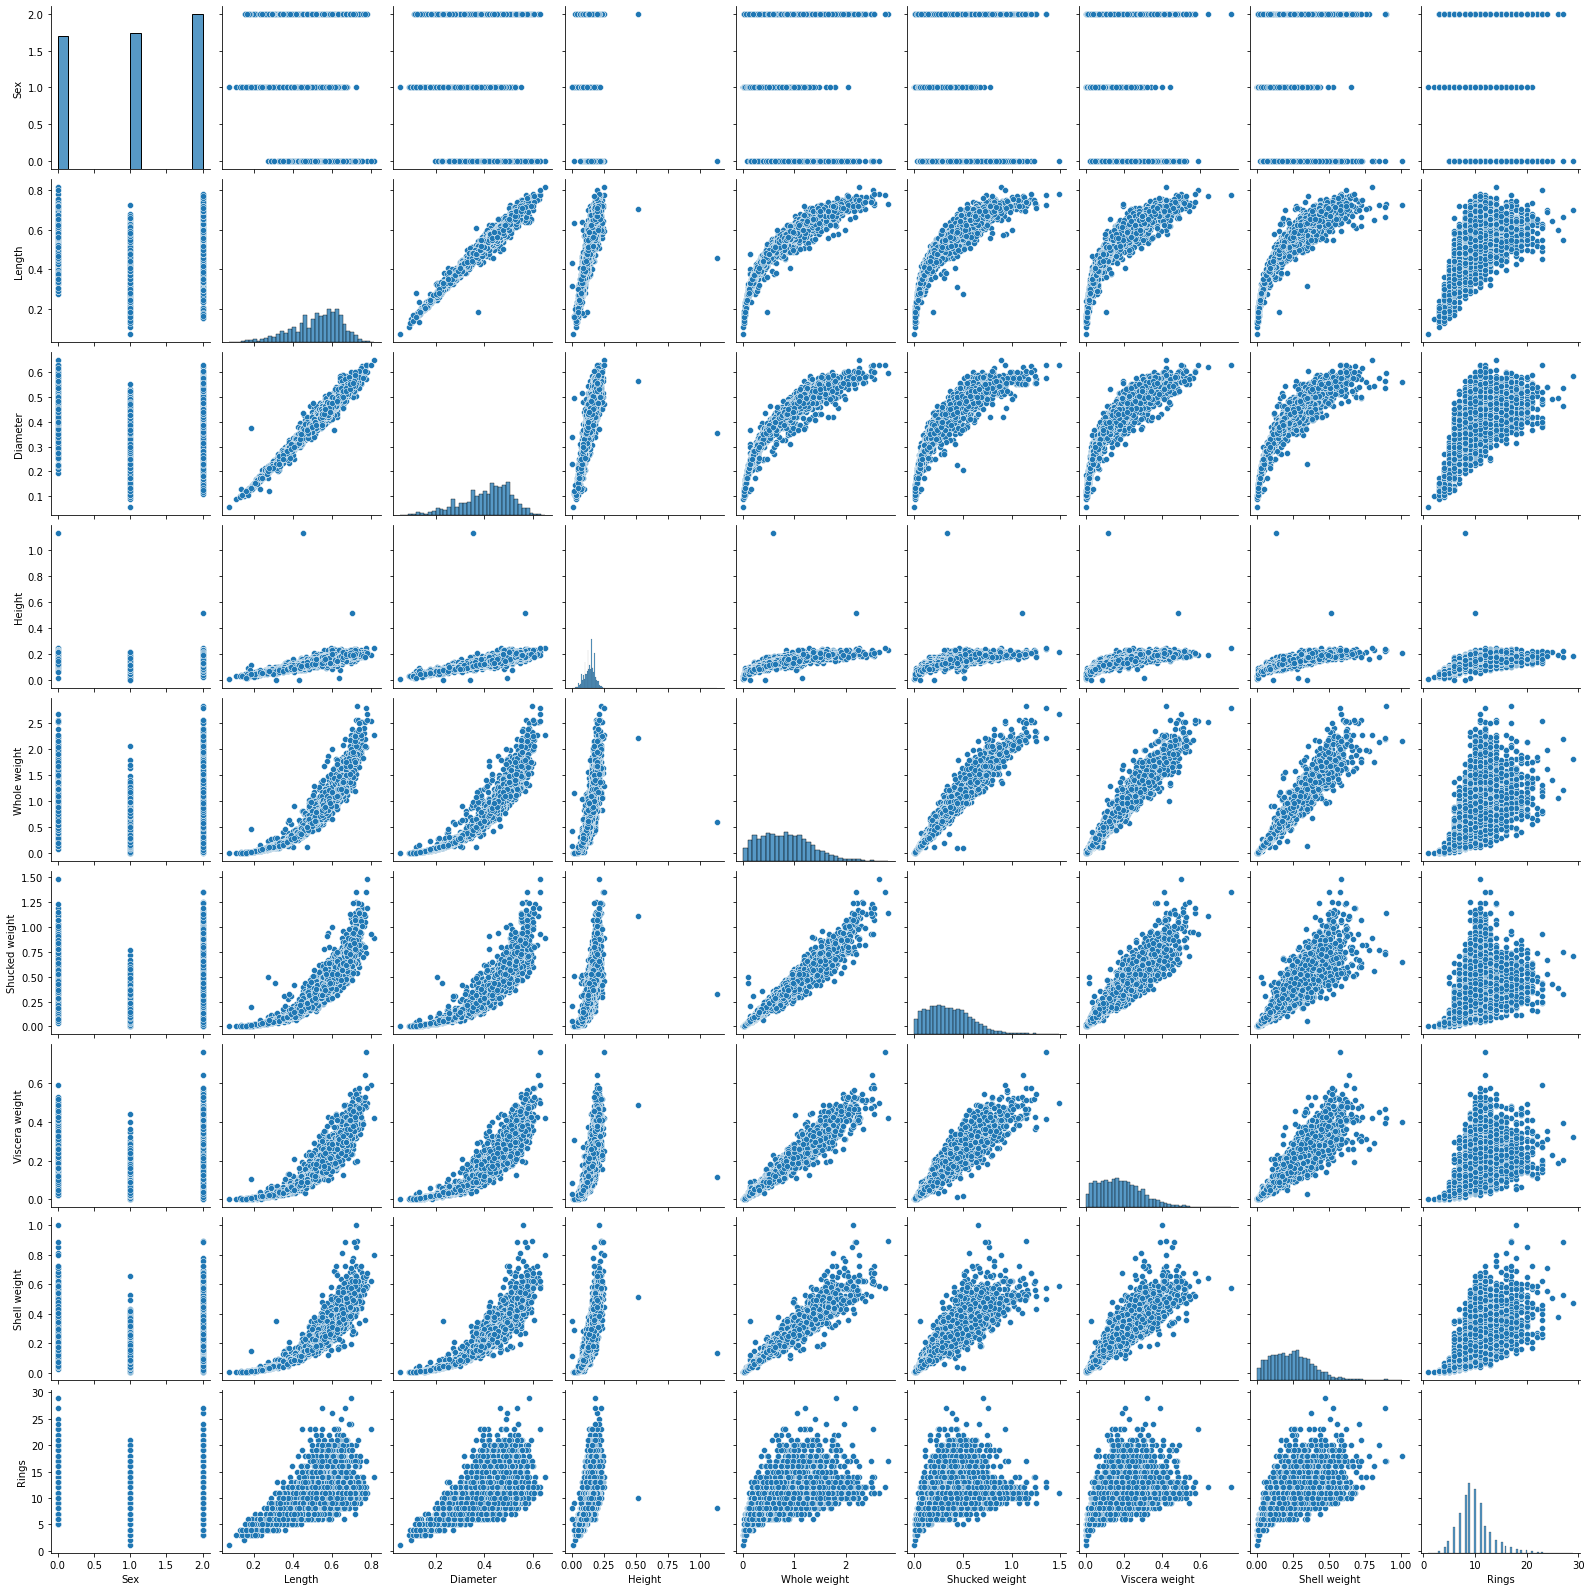

In [32]:
#Plotting all the variables in respect to all the variable to determine each relationships b/w the variables 

sns.pairplot(df)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

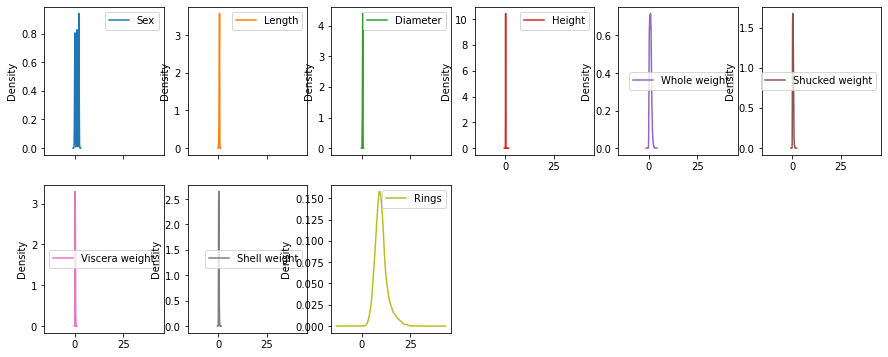

In [33]:
#Determining the skewness present in all the columns

df.plot(kind='kde',subplots=True,layout=(2,6),figsize=(15,6))

Sex                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Length            AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Diameter          AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Height            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Whole weight      AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Shucked weight    AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Viscera weight          AxesSubplot(0.125,0.125;0.110714x0.343182)
Shell weight         AxesSubplot(0.257857,0.125;0.110714x0.343182)
Rings                AxesSubplot(0.390714,0.125;0.110714x0.343182)
dtype: object

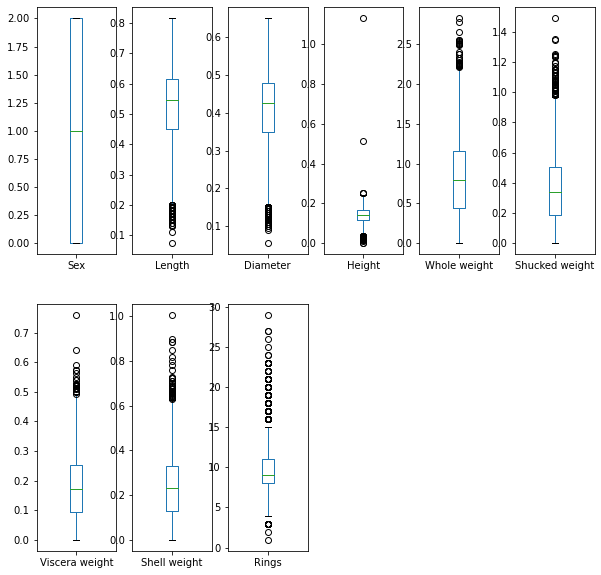

In [34]:
#Showing boxplots of all the variables

df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

# CO-RELATION

In [35]:
#Determining the corelations b/w the columns storing it into the dfcor name variable & printing it

dfcor=df.corr()
dfcor

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

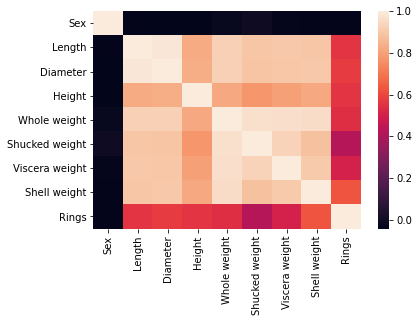

In [36]:
#Ploting heatmap of the corelation for better understanding
#Showing corelation through heatmap
#Here lighter colors are HIGHLY CORELATED

sns.heatmap(dfcor)

<AxesSubplot:>

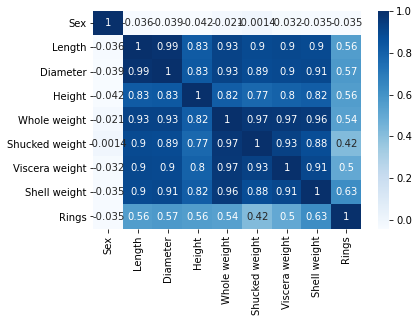

In [37]:
#Showing corelation through heatmap & also printing values for better understanding
#Here all the DARK COLUMNS are HIGHLY CORELATED

sns.heatmap(dfcor,annot=True,cmap='Blues')

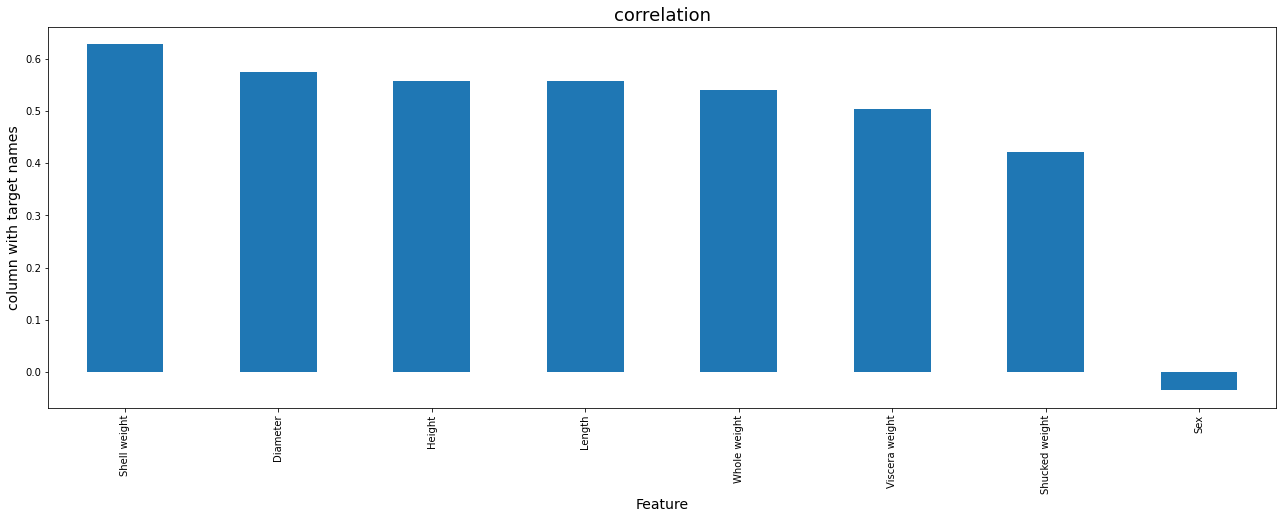

In [38]:
#Showing all the columns  positively & negatively corelated

plt.figure(figsize=(22,7))
df.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='bar')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# PLOTTING OUTLIERS

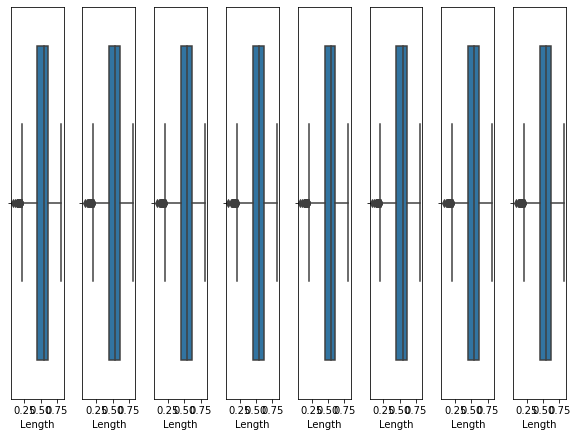

In [39]:
#Defining the no of rows & columns in one-one variable
#Differntiating the columns by names & storing it into collist
#Ploting box plot for ploting outliers

ncol=12
nrows=10
collist=df.columns.values

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[1]],orient='v')
    plt.tight_layout()

# PLOTING SKEWNESS

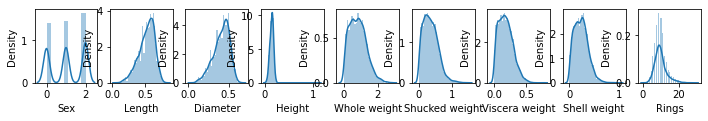

In [40]:
#Ploting skewness

plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

# REMOVING OUTLIERS

In [41]:
#for removing outliers importing zscore

from scipy.stats import zscore

In [42]:
#Through the function converting all the -ve values into the +ve

z=np.abs(zscore(df))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [43]:
#Setted all the limits but can only score is

threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [44]:
#Showing the values of zscore

z[6][8]

3.12251641377204

In [45]:
#Showing random values from the zscore

z[4145][7]

3.0043906996440928

In [46]:
#Determining  25 % & stored in the Q1 for determining IQR

Q1=df.quantile(0.25)

In [47]:
#Determining  75 % & stored in the Q1 for determining IQR

Q3=df.quantile(0.75)

In [48]:
#Printing Q1

Q1

Sex               0.0000
Length            0.4500
Diameter          0.3500
Height            0.1150
Whole weight      0.4415
Shucked weight    0.1860
Viscera weight    0.0935
Shell weight      0.1300
Rings             8.0000
Name: 0.25, dtype: float64

In [49]:
#Printing Q3

Q3

Sex                2.000
Length             0.615
Diameter           0.480
Height             0.165
Whole weight       1.153
Shucked weight     0.502
Viscera weight     0.253
Shell weight       0.329
Rings             11.000
Name: 0.75, dtype: float64

In [50]:
#Printing inter-quartile-range

IQR=Q3-Q1
IQR

Sex               2.0000
Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Rings             3.0000
dtype: float64

In [51]:
#As stated in the problem statement we need to add 1.5 to IQR

print((df<(Q1-(1.5*IQR)))|(df>(Q3+(1.5*IQR))))

        Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0     False   False     False   False         False           False   
1     False   False     False   False         False           False   
2     False   False     False   False         False           False   
3     False   False     False   False         False           False   
4     False   False     False   False         False           False   
...     ...     ...       ...     ...           ...             ...   
4172  False   False     False   False         False           False   
4173  False   False     False   False         False           False   
4174  False   False     False   False         False           False   
4175  False   False     False   False         False           False   
4176  False   False     False   False         False           False   

      Viscera weight  Shell weight  Rings  
0              False         False  False  
1              False         False  False  
2              

# REMOVING & SHOWING SKEWNESS

In [52]:
#Printing skewness

df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [53]:
#Importing skewn

from scipy.stats import skew

Sex
-0.09811989796728826


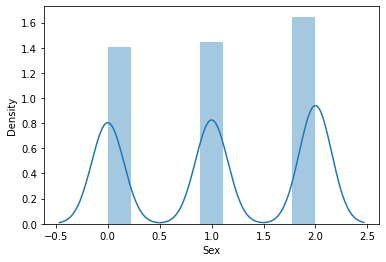

Length
-0.6396434615451078


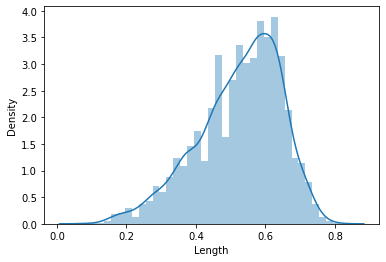

Diameter
-0.6089793517180232


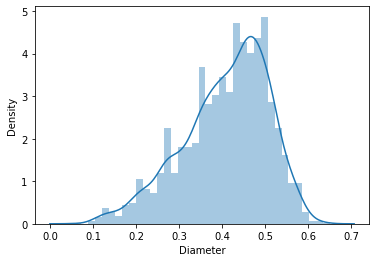

Height
3.127693679207538


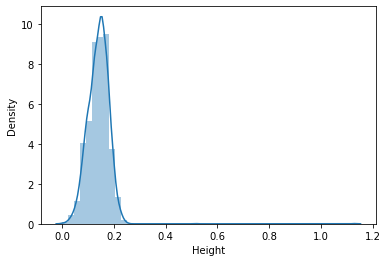

Whole weight
0.5307678720133928


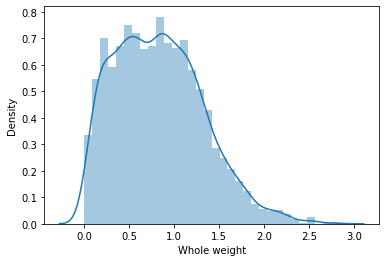

Shucked weight
0.7188396611678955


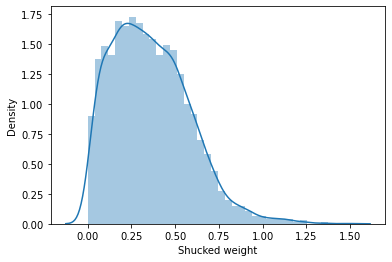

Viscera weight
0.5916395905344537


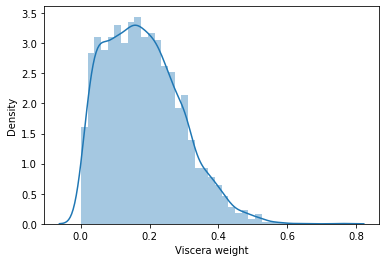

Shell weight
0.6207038222275745


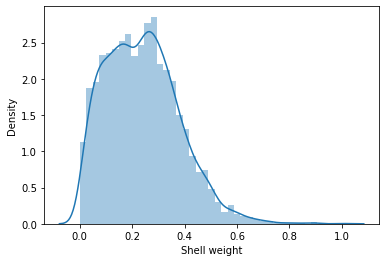

Rings
1.1137017739656028


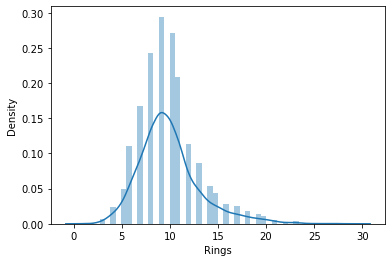

In [54]:
#Printing skewness of all the variables

for col in df:
    print(col)
    print(skew(df[col]))
    
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

<AxesSubplot:xlabel='Height', ylabel='Density'>

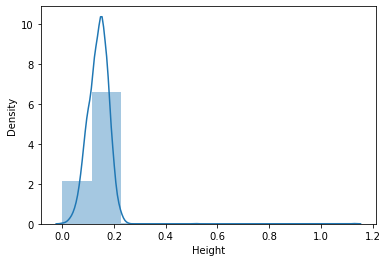

In [55]:
#Showing distribution plot

sns.distplot(df['Height'],bins=10)

In [56]:
#Removing skewness from the Height column

df['Height']=np.sqrt(df['Height'])
skew(df['Height'])

-0.29553433137366636

<AxesSubplot:xlabel='Height', ylabel='Density'>

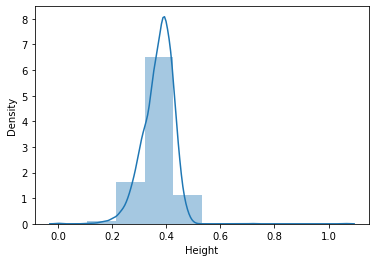

In [57]:
#Ploting distribution plot 

sns.distplot(df['Height'],bins=10)

<AxesSubplot:xlabel='Rings', ylabel='Density'>

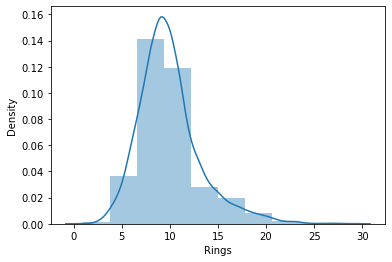

In [58]:
#Showing distribution plot

sns.distplot(df['Rings'],bins=10)

In [59]:
#Removing skewness from Rings

df['Rings']=np.sqrt(df['Rings'])
skew(df['Rings'])

0.47119711362892247

In [60]:
#Showing skewness

df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height           -0.295641
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             0.471366
dtype: float64

In [61]:
#Droping Sex column from the dataset & adding new column IsAdult

df['IsAdult'] = [0 if x=='I' else 1 for x in df['Sex']]
data_tf = df.drop('Sex', axis=1)
data_tf.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,IsAdult
0,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.150,3.872983,1
1,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.070,2.645751,1
2,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.210,3.000000,1
3,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.155,3.162278,1
4,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.055,2.645751,1


# DIVIDING INTO TRAINING & TESTING

In [62]:
#Dividing training & testing phase of the data

x = data_tf.drop('Rings', axis=1)
y = data_tf['Rings'].values

In [63]:
#Sending 25 % of the data for testing  

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# STANDARD SCALING

In [64]:
#Importing standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# MODELS

In [65]:
#Importing Models

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

classifiers = [
    SGDRegressor(),
    LinearSVR(),
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]

# CROSS VALIDATION

In [66]:
#Cross-validating the model

from sklearn.model_selection import cross_val_score

for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    scores = cross_val_score(clf, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    
    print('****Results****')
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Std deviation: ", scores.std())
    
print("="*30)

SGDRegressor
****Results****
Scores:  [-0.11320671 -0.10520067 -0.1323668  -0.11102763 -0.11957513 -0.13608056
 -0.09995693 -0.09014029 -0.0912063  -0.10602301]
Mean:  -0.11047840354084933
Std deviation:  0.01472592047732821
LinearSVR
****Results****
Scores:  [-0.11491297 -0.10357952 -0.13298108 -0.10933943 -0.11927003 -0.13766784
 -0.1020324  -0.09254679 -0.08957544 -0.10552801]
Mean:  -0.11074335143762462
Std deviation:  0.014983664293260165
LinearRegression
****Results****
Scores:  [-0.1152755  -0.10403676 -0.12572422 -0.10727515 -0.11899197 -0.13353757
 -0.09751434 -0.08653236 -0.08693587 -0.1038625 ]
Mean:  -0.10796862442884028
Std deviation:  0.014791618349690736
DecisionTreeRegressor
****Results****
Scores:  [-0.16442979 -0.18258038 -0.18376633 -0.18665025 -0.20311788 -0.21741539
 -0.20318157 -0.17754673 -0.17913993 -0.20269404]
Mean:  -0.19005223004256536
Std deviation:  0.015134524340855281
RandomForestRegressor
****Results****
Scores:  [-0.10707004 -0.10042818 -0.10611712 -0.

# HYPER PARAMETER TUNNING

In [67]:
#Importing Grid search cv 

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

rnd_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rnd_reg, param_grid, cv=5, scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [68]:
#Finding best parameters

grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [69]:
#Best model

best_reg = grid_search.best_estimator_
y_pred = best_reg.predict(x_test)
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

0.31833868426402867

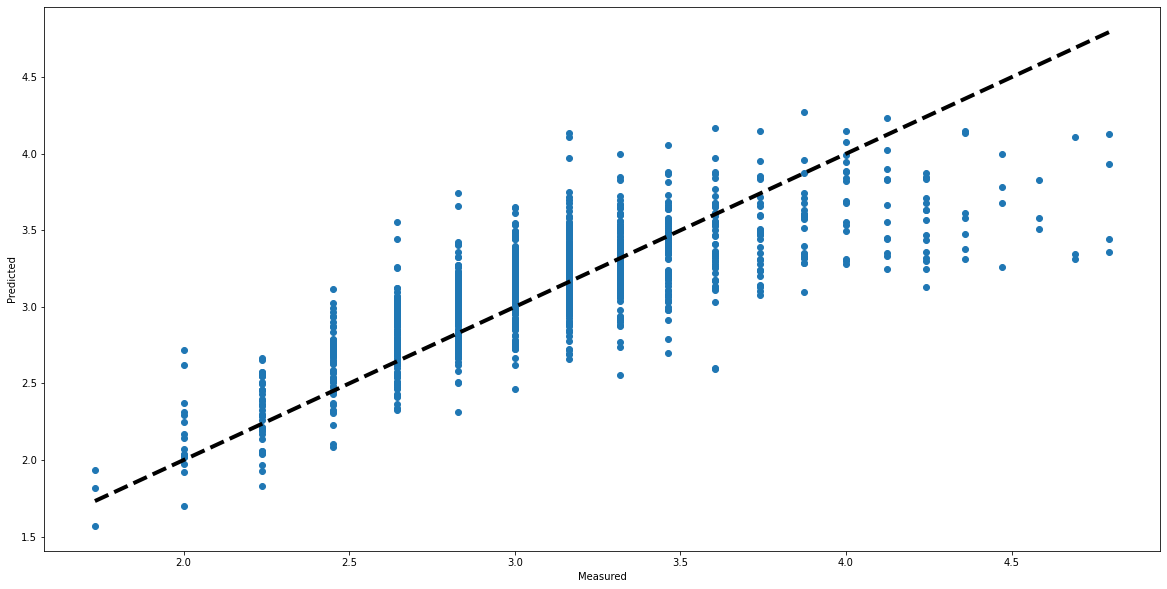

In [70]:
#Ploting a diagram of the predicted & measured results

fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# SAVING MODEL

In [71]:
#Saving our best model

import pickle
filename= 'ABALONE.pkl'
pickle.dump(final_rmse, open(filename, 'wb'))